In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import zipfile

## Inspect Data

In [6]:
!ls data/pizza_steak/train/steak

1000205.jpg 1647351.jpg 2238681.jpg 2824680.jpg 3375959.jpg 417368.jpg
100135.jpg  1650002.jpg 2238802.jpg 2825100.jpg 3381560.jpg 4176.jpg
101312.jpg  165639.jpg  2254705.jpg 2826987.jpg 3382936.jpg 42125.jpg
1021458.jpg 1658186.jpg 225990.jpg  2832499.jpg 3386119.jpg 421476.jpg
1032846.jpg 1658443.jpg 2260231.jpg 2832960.jpg 3388717.jpg 421561.jpg
10380.jpg   165964.jpg  2268692.jpg 285045.jpg  3389138.jpg 438871.jpg
1049459.jpg 167069.jpg  2271133.jpg 285147.jpg  3393547.jpg 43924.jpg
1053665.jpg 1675632.jpg 227576.jpg  2855315.jpg 3393688.jpg 440188.jpg
1068516.jpg 1678108.jpg 2283057.jpg 2856066.jpg 3396589.jpg 442757.jpg
1068975.jpg 168006.jpg  2286639.jpg 2859933.jpg 339891.jpg  443210.jpg
1081258.jpg 1682496.jpg 2287136.jpg 286219.jpg  3417789.jpg 444064.jpg
1090122.jpg 1684438.jpg 2291292.jpg 2862562.jpg 3425047.jpg 444709.jpg
1093966.jpg 168775.jpg  229323.jpg  2865730.jpg 3434983.jpg 447557.jpg
1098844.jpg 1697339.jpg 2300534.jpg 2878151.jpg 3435358.jpg 461187.jpg
1100074.jp

In [9]:
import os
for dirpath, dirnames, filenames in os.walk('data/pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 1 images in data/pizza_steak
There are 2 directories and 1 images in data/pizza_steak/test
There are 0 directories and 250 images in data/pizza_steak/test/steak
There are 0 directories and 250 images in data/pizza_steak/test/pizza
There are 2 directories and 1 images in data/pizza_steak/train
There are 0 directories and 750 images in data/pizza_steak/train/steak
There are 0 directories and 750 images in data/pizza_steak/train/pizza


In [20]:
import pathlib
data_dir = pathlib.Path('data/pizza_steak/train/')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [22]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'Image shape: {img.shape}')

    return img

Image shape: (512, 512, 3)


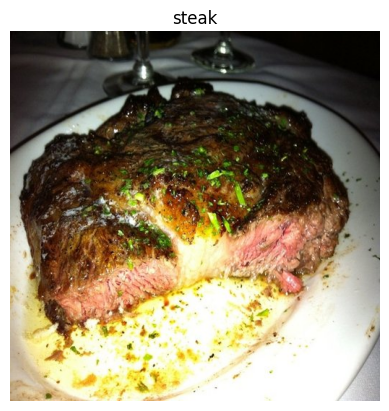

In [26]:
img = view_random_image(target_dir='data/pizza_steak/train/',
                        target_class='steak')

In [29]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  8,   2,   2],
        [ 10,   4,   4],
        [ 11,   5,   5],
        ...,
        [  3,   2,   0],
        [  3,   2,   0],
        [  3,   2,   0]],

       [[ 10,   4,   4],
        [ 11,   5,   5],
        [ 11,   5,   5],
        ...,
        [  3,   2,   0],
        [  4,   3,   0],
        [  4,   3,   0]],

       [[ 11,   5,   5],
        [ 10,   4,   4],
        [ 10,   4,   4],
        ...,
        [  4,   3,   0],
        [  4,   3,   0],
        [  5,   4,   0]],

       ...,

       [[187, 154, 111],
        [187, 156, 112],
        [190, 158, 117],
        ...,
        [167, 166, 172],
        [175, 174, 180],
        [152, 151, 157]],

       [[177, 143,  98],
        [176, 143,  98],
        [178, 145, 102],
        ...,
        [154, 153, 161],
        [144, 143, 151],
        [153, 152, 160]],

       [[179, 145, 100],
        [175, 141,  96],
        [173, 140,  97],
        ...,
        [156, 155, 16

In [36]:
img[0].shape

(512, 3)

#  Modeling

## An end-to-end Example

* Load our images
* Preprocess our images
* Build a CNN to find patterns
* Compile
* Fit the CNN to training data

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocess the data - normilize it
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up path 
train_dir = 'data/pizza_steak/train/'
test_dir = 'data/pizza_steak/test/'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42)

# Build the model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(2), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2023-04-03 16:47:43.944156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.5525 - accuracy: 0.7193

2023-04-03 16:48:13.218190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 34s 698ms/step - loss: 0.5525 - accuracy: 0.7193 - val_loss: 0.4046 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 32s 666ms/step - loss: 0.4108 - accuracy: 0.8167 - val_loss: 0.3451 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 32s 673ms/step - loss: 0.4129 - accuracy: 0.8220 - val_loss: 0.4520 - val_accuracy: 0.8020
Epoch 4/5
47/47 [==============================] - 31s 665ms/step - loss: 0.3842 - accuracy: 0.8300 - val_loss: 0.3297 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 33s 689ms/step - loss: 0.3082 - accuracy: 0.8840 - val_loss: 0.3133 - val_accuracy: 0.8640


## Old model to images

In [45]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5


2023-04-04 10:39:27.361209: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.9511 - accuracy: 0.5193

2023-04-04 10:39:35.693897: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 11s 200ms/step - loss: 0.9511 - accuracy: 0.5193 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 158ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [46]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 4)                 602116    
                                                                 
 dense_3 (Dense)             (None, 4)                 20        
                                                                 
 dense_4 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot: title={'center': 'Model 2'}>

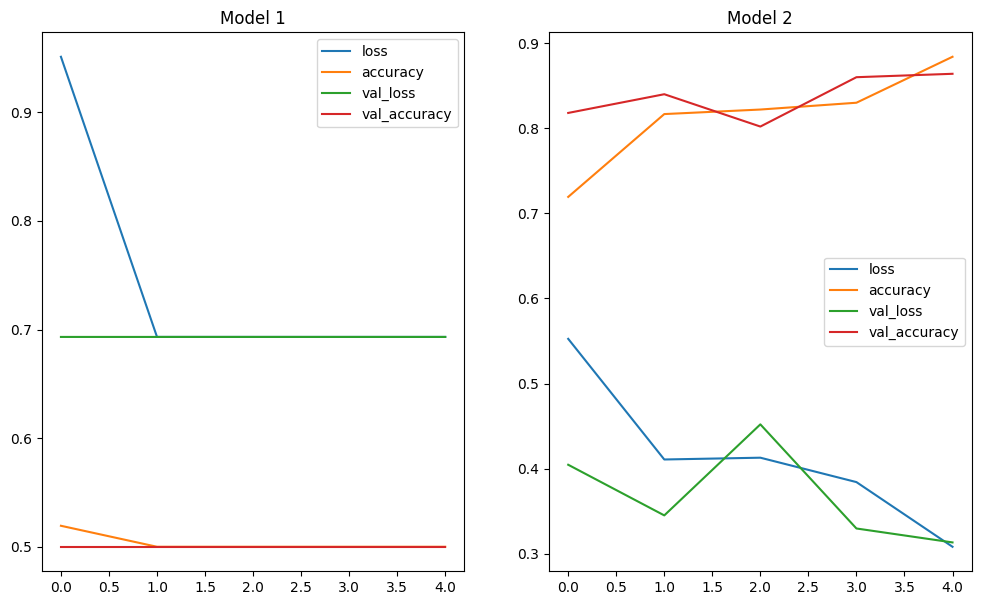

In [47]:
import pandas as pd

plt.figure(figsize=(12, 7))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Model 1')
pd.DataFrame(history_2.history).plot(ax=ax1)
ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Model 2')
pd.DataFrame(history_1.history).plot(ax=ax2)

In [48]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5


2023-04-04 10:41:03.115706: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 3.5030 - accuracy: 0.6100

2023-04-04 10:41:14.398045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 14s 267ms/step - loss: 3.5030 - accuracy: 0.6100 - val_loss: 2.3126 - val_accuracy: 0.5540
Epoch 2/5
47/47 [==============================] - 12s 256ms/step - loss: 1.6187 - accuracy: 0.6780 - val_loss: 0.6217 - val_accuracy: 0.7740
Epoch 3/5
47/47 [==============================] - 13s 265ms/step - loss: 0.5765 - accuracy: 0.7600 - val_loss: 0.4138 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 12s 258ms/step - loss: 0.5719 - accuracy: 0.7620 - val_loss: 0.4701 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 12s 249ms/step - loss: 0.5052 - accuracy: 0.7807 - val_loss: 0.4344 - val_accuracy: 0.7960


<AxesSubplot: title={'center': 'Model 3'}>

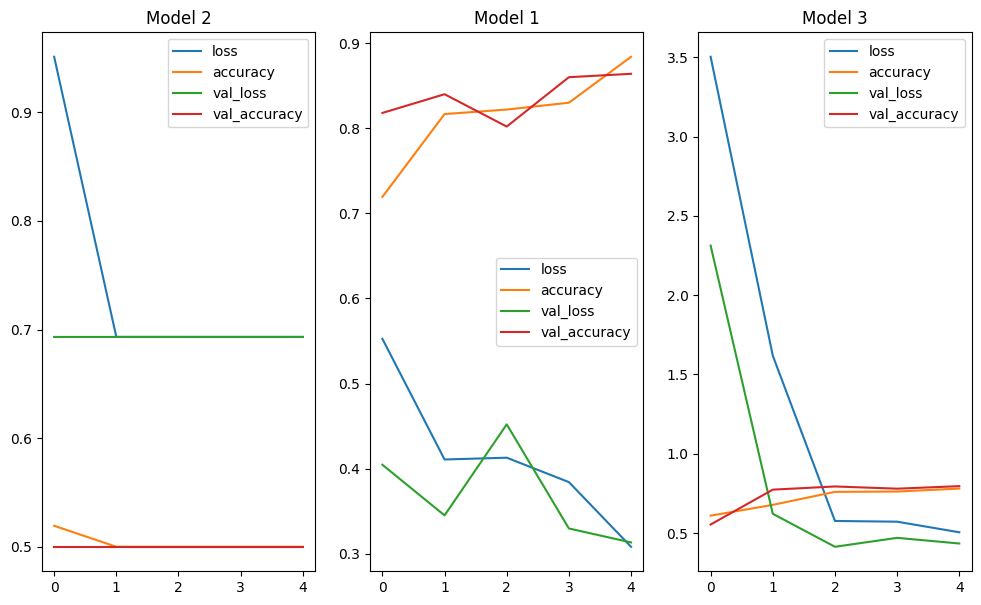

In [49]:
plt.figure(figsize=(12, 7))
ax1 = plt.subplot(1, 3, 1)
ax1.set_title('Model 2')
pd.DataFrame(history_2.history).plot(ax=ax1)
ax2 = plt.subplot(1, 3, 2)
ax2.set_title('Model 1')
pd.DataFrame(history_1.history).plot(ax=ax2)
ax3 = plt.subplot(1, 3, 3)
ax3.set_title('Model 3')
pd.DataFrame(history_3.history).plot(ax=ax3)

In [50]:
import tensorflow as tf

input_tensor = tf.ones((3, 5, 6))  # Create a tensor with shape (3, 5, 6)
flatten_layer = tf.keras.layers.Flatten(input_shape=(5, 6))  # Create the Flatten layer

# Pass the input tensor through the Flatten layer
output_tensor = flatten_layer(input_tensor)

print(f"Input tensor shape: {input_tensor.shape}")
print(f"Output tensor shape: {output_tensor.shape}")

Input tensor shape: (3, 5, 6)
Output tensor shape: (3, 30)


# Break Down

### 1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


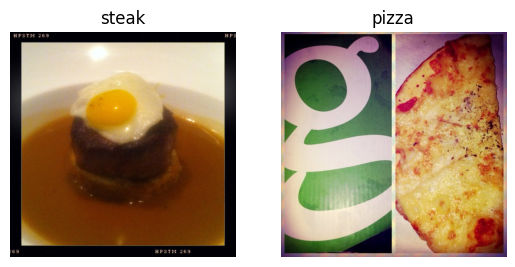

In [51]:
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('data/pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('data/pizza_steak/train/', 'pizza')

## 2. Preprocess the data

In [52]:
# Define directory data set path
train_dir = 'data/pizza_steak/train/'
test_dir = 'data/pizza_steak/test/'

In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [54]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [55]:
images, labels = train_data[0]
images.shape

(32, 224, 224, 3)

In [56]:
images[0][223].shape

(224, 3)

## Create the Model

In [57]:
tf.random.set_seed(42)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

model_4 = Sequential([
    Conv2D(filters=10, 
           kernel_size=3,
           strides=1,
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [58]:
# Compile the model
model_4.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

### 4. Fit the model

In [59]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_5 (Flatten)         (None, 475240)            0         
                                                                 
 dense_9 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [60]:
len(train_data), len(test_data)

(47, 16)

In [61]:
# Fit the model
history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-04-04 11:13:39.634538: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.8309 - accuracy: 0.6060

2023-04-04 11:14:14.168728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 38s 760ms/step - loss: 0.8309 - accuracy: 0.6060 - val_loss: 0.5774 - val_accuracy: 0.6740
Epoch 2/5
47/47 [==============================] - 36s 762ms/step - loss: 0.4689 - accuracy: 0.7940 - val_loss: 0.3478 - val_accuracy: 0.8500
Epoch 3/5
47/47 [==============================] - 37s 782ms/step - loss: 0.3292 - accuracy: 0.8660 - val_loss: 0.3451 - val_accuracy: 0.8420
Epoch 4/5
47/47 [==============================] - 36s 769ms/step - loss: 0.1927 - accuracy: 0.9387 - val_loss: 0.3488 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 36s 767ms/step - loss: 0.0928 - accuracy: 0.9753 - val_loss: 0.3780 - val_accuracy: 0.8360


### Evaluating Model

Text(0.5, 1.0, 'Base Model')

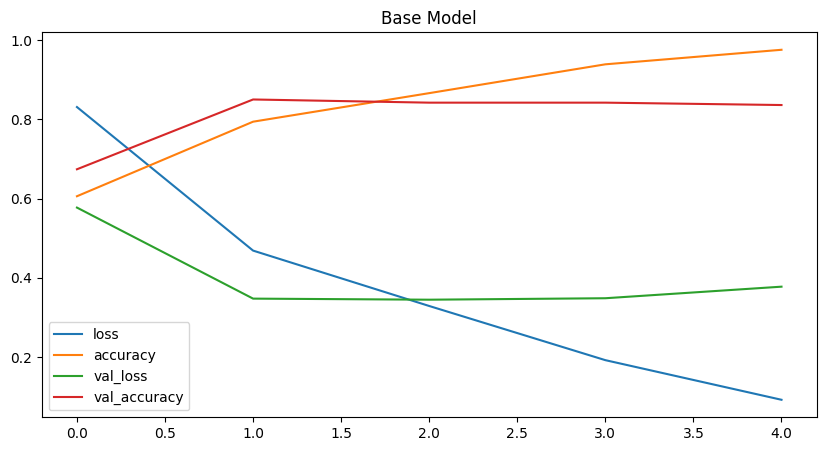

In [65]:
pd.DataFrame(history_4.history).plot(figsize=(10, 5))
plt.title('Base Model')

In [84]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

    ax[0].plot(epochs, loss, label='Training loss')
    ax[0].plot(epochs, val_loss, label='Val loss')
    ax[0].set_title('Loss')
    ax[0].set_xlabel('epochs')
    ax[0].legend()

    ax[1].plot(epochs, accuracy, label='Training accuracy')
    ax[1].plot(epochs, val_accuracy, label='Val accuracy')
    ax[1].set_title('Accuracy')
    ax[1].set_xlabel('epochs')
    ax[1].legend()


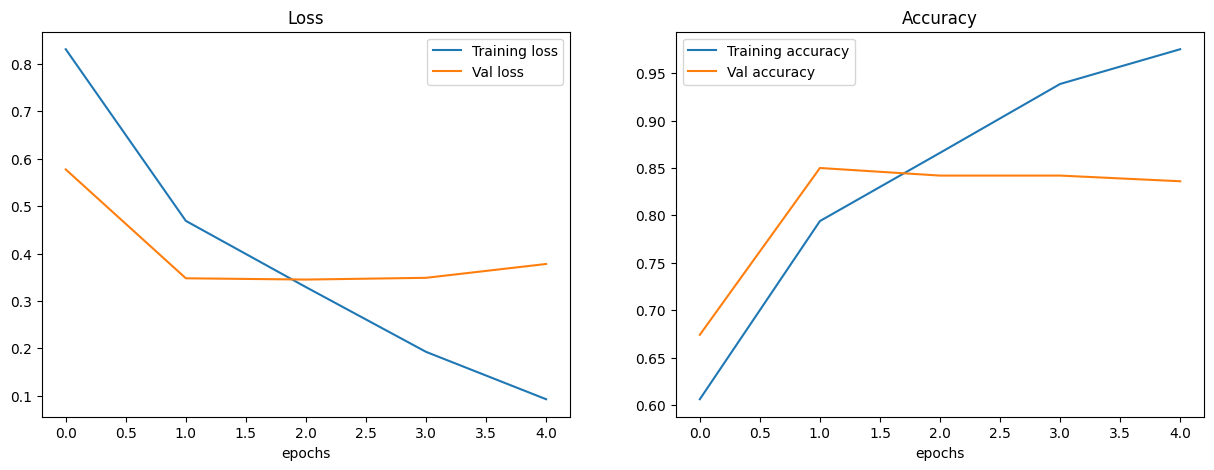

In [85]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters


3 steps:

0. Create a baseline 
1. Beat the baseline by overfitting the larger model
2. Reduce overfitting

In [90]:
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [91]:
model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [92]:
history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-04-04 15:40:39.411175: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6329 - accuracy: 0.6493

2023-04-04 15:40:54.316334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 18s 342ms/step - loss: 0.6329 - accuracy: 0.6493 - val_loss: 0.5152 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 15s 328ms/step - loss: 0.4750 - accuracy: 0.7787 - val_loss: 0.4112 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 16s 343ms/step - loss: 0.4346 - accuracy: 0.8120 - val_loss: 0.3786 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 17s 349ms/step - loss: 0.4357 - accuracy: 0.8147 - val_loss: 0.3794 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 16s 346ms/step - loss: 0.3935 - accuracy: 0.8313 - val_loss: 0.3309 - val_accuracy: 0.8680


In [93]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)      

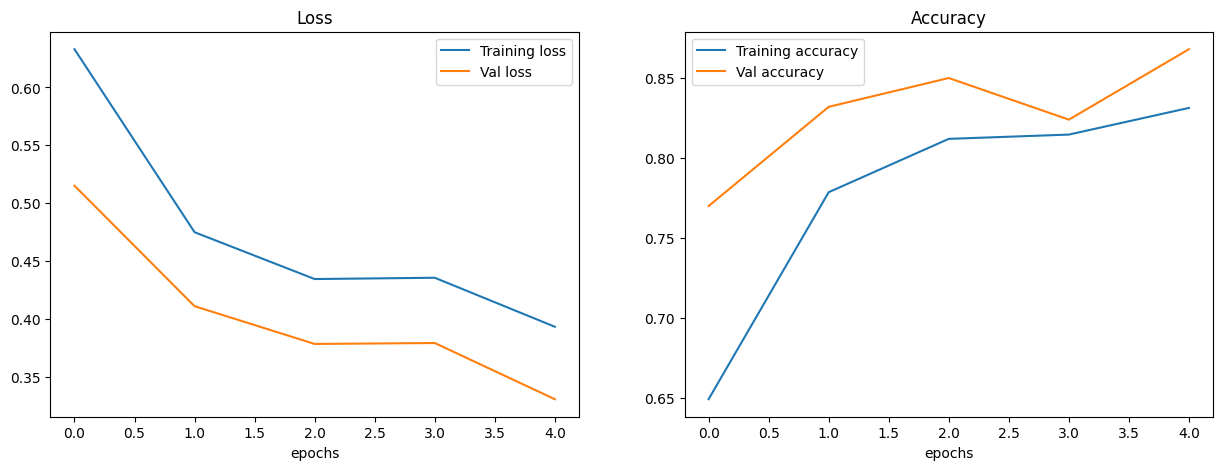

In [94]:
plot_loss_curves(history_5)

### Data Augmentation

In [126]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [98]:
print('Augumented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False)
print('Non - augumented training data')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
print('Non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augumented training data
Found 1500 images belonging to 2 classes.
Non - augumented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [101]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

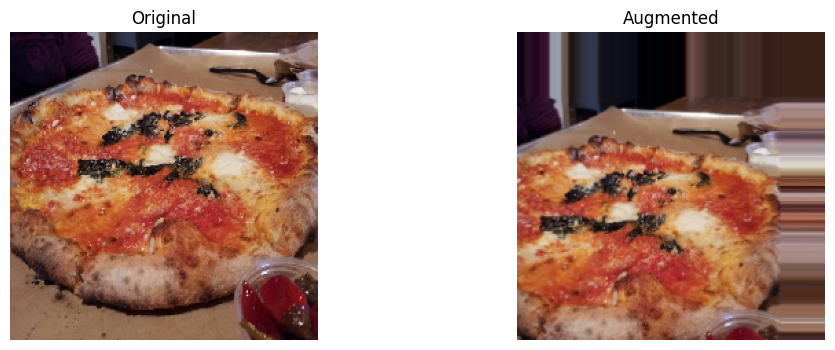

In [112]:
random_number = random.randint(0, 31) # because batch size is 32
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.axis('off')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.title('Augmented')
plt.imshow(augmented_images[random_number])
plt.axis('off')

#### New Model with Augmented Data

In [113]:
tf.random.set_seed(42)

model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_6.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [124]:
history_6 = model_6.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-04-04 21:34:30.470648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.5831 - accuracy: 0.7193

2023-04-04 21:34:57.946121: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 30s 637ms/step - loss: 0.5831 - accuracy: 0.7193 - val_loss: 0.4148 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 30s 626ms/step - loss: 0.5525 - accuracy: 0.7273 - val_loss: 0.4126 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 30s 633ms/step - loss: 0.5703 - accuracy: 0.7207 - val_loss: 0.4576 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 29s 623ms/step - loss: 0.5425 - accuracy: 0.7367 - val_loss: 0.4180 - val_accuracy: 0.8000
Epoch 5/5
47/47 [==============================] - 28s 583ms/step - loss: 0.4853 - accuracy: 0.7807 - val_loss: 0.7165 - val_accuracy: 0.6580


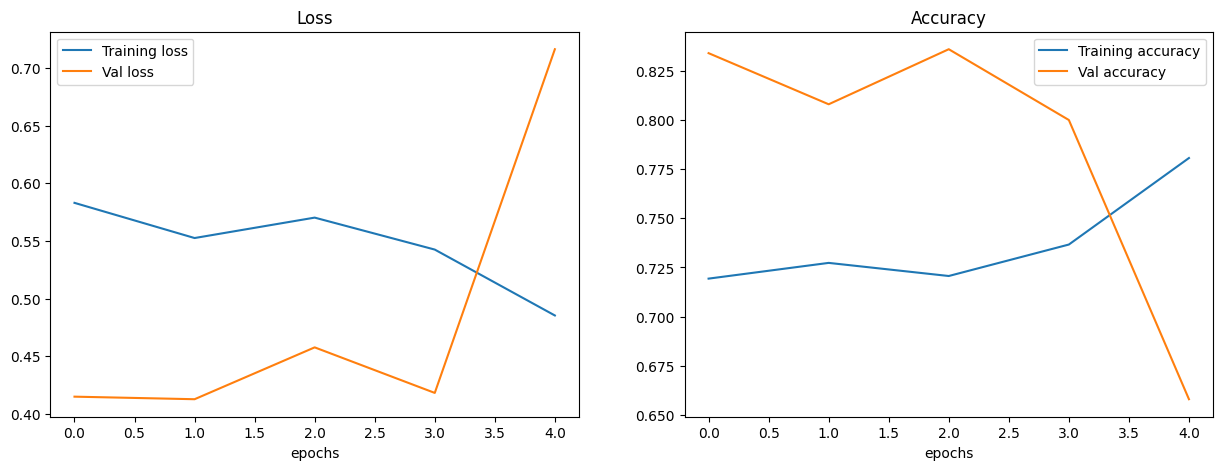

In [125]:
plot_loss_curves(history_6)

#### One More Augmented Model (with shuffle)

In [128]:
# Import and augment data
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                        target_size=(224, 224),
                                                                        batch_size=32,
                                                                        class_mode='binary',
                                                                        shuffle=True)


Found 1500 images belonging to 2 classes.


In [129]:
tf.random.set_seed(42)

model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [130]:
history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-04-04 21:45:23.401430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6208 - accuracy: 0.6507

2023-04-04 21:45:51.875078: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 31s 635ms/step - loss: 0.6208 - accuracy: 0.6507 - val_loss: 0.4478 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 29s 620ms/step - loss: 0.5212 - accuracy: 0.7527 - val_loss: 0.4074 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 30s 625ms/step - loss: 0.4965 - accuracy: 0.7653 - val_loss: 0.3658 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 29s 622ms/step - loss: 0.4997 - accuracy: 0.7633 - val_loss: 0.4556 - val_accuracy: 0.7880
Epoch 5/5
47/47 [==============================] - 29s 617ms/step - loss: 0.4714 - accuracy: 0.7780 - val_loss: 0.4798 - val_accuracy: 0.7640


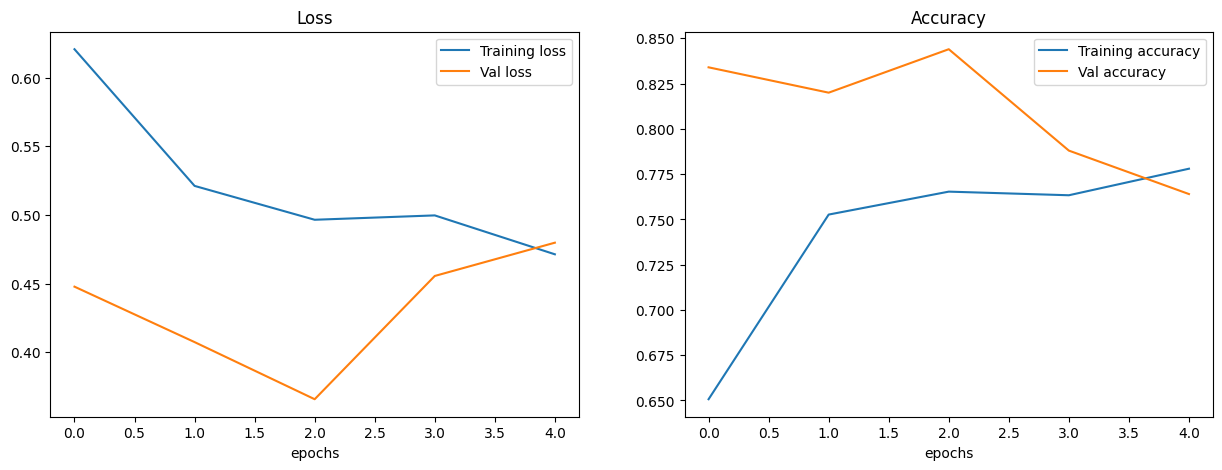

In [131]:
plot_loss_curves(history_7)

## Making a prediction with our trained model on our own custom data

In [132]:
print(class_names)

['pizza' 'steak']


In [133]:
pizza_mine = mpimg.imread('data/pizza_mine.jpg')

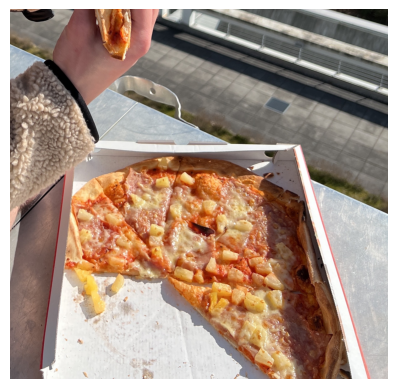

In [138]:
plt.imshow(pizza_mine);
plt.axis('off');

In [139]:
pizza_mine.shape

(1778, 1818, 3)

In [145]:
def load_prep_image(filename, img_shape=224):
    """
    Read an image from filename, turns it into tensor and reshapes it to (img_shape, img_shape, colour_channels)
    """
    img = tf.io.read_file(filename)
    # Decode the readfile in tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image, get all the values between 0 and 1
    img /= 255.
    return img

In [151]:
expanded_pizza_mine = load_prep_image('data/pizza_mine.jpg')
expanded_pizza_mine.shape

TensorShape([224, 224, 3])

In [158]:
pred = model_7.predict(tf.expand_dims(expanded_pizza_mine, axis=0))

1/1 [==============================] - 0s 35ms/step


In [157]:
class_names[0]

'pizza'

In [160]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'pizza'

In [194]:
def pred_and_plot(model, filename, class_names=class_names):
    img = load_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.axis(False)
    plt.title(f'{pred_class} with prob = {pred[0, 0]:.3f}')

1/1 [==============================] - 0s 31ms/step


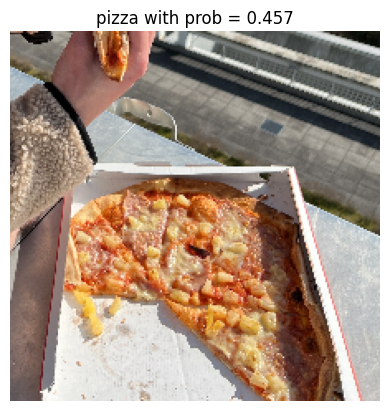

In [213]:
pred_and_plot(model_5, 'data/pizza_mine.jpg')

1/1 [==============================] - 0s 32ms/step


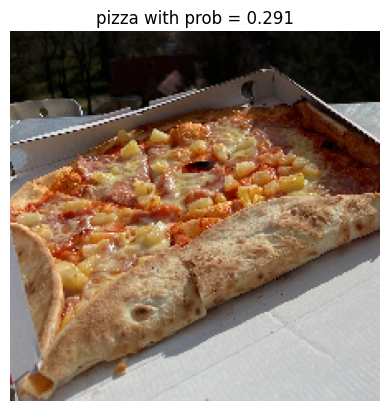

In [212]:
pred_and_plot(model_5, 'data/pizza_mine_1.jpg')

1/1 [==============================] - 0s 32ms/step


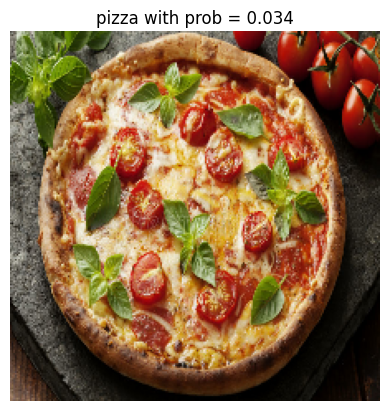

In [211]:
pred_and_plot(model_5, 'data/1234.jpg')

1/1 [==============================] - 0s 139ms/step


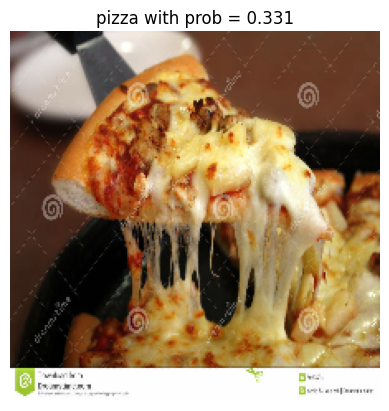

In [210]:
pred_and_plot(model_5, 'data/2.jpg')